In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import torch
from test import load_bw_image, load_color_image, predict

from model.resnet_unet import ResNetBasedUNet

device = torch.device('cuda')

In [4]:
model_path = 'checkpoint/lr1e-05_2020-05-19-11-59-45_frozen_resnet_encoder_smaller_lr/epoch0_iter19999.pt'
model = torch.nn.DataParallel(ResNetBasedUNet().to(device))

checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

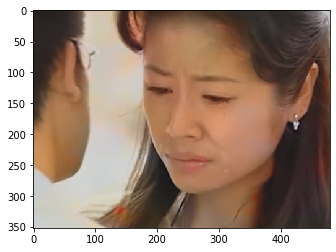

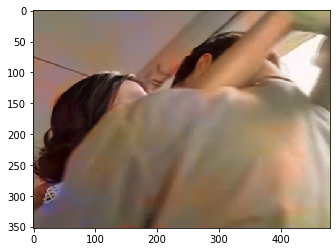

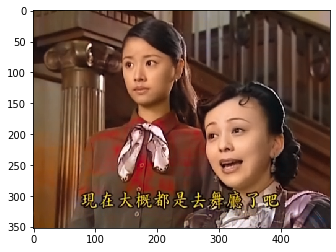

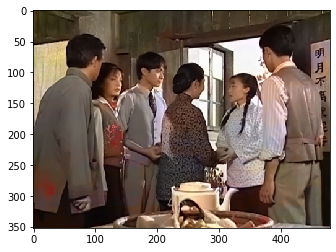

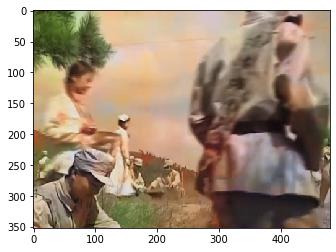

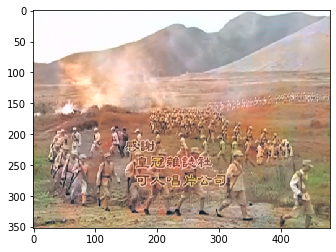

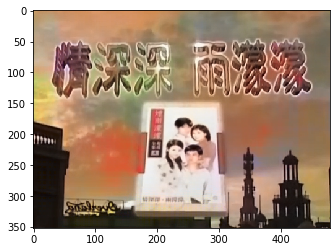

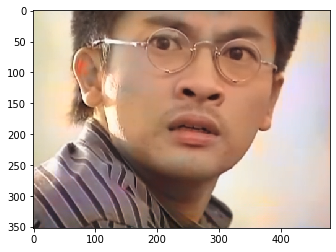

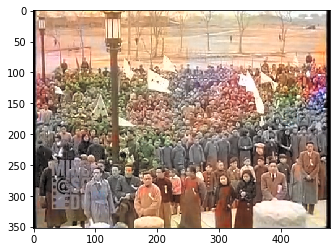

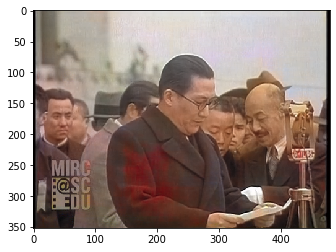

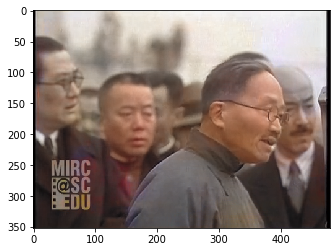

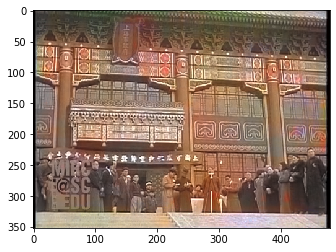

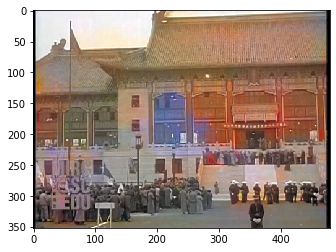

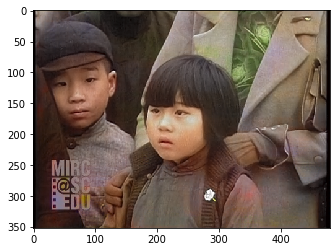

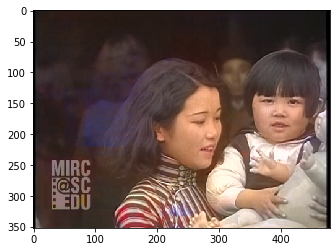

In [5]:
color_images = [
    '../../datasets/train/qing-ep38-03894.png',
    '../../datasets/train/qing-ep49-04922.png',
    '../../datasets/train/qing-ep13-01085.png',
    '../../datasets/train/qing-ep26-02252.png',
    '../../datasets/test/qing-ep35-01021.png',
    '../../datasets/test/qing-ep05-05443.png',
    '../../datasets/test/qing-ep35-05470.png',
    '../../datasets/test/qing-ep15-05389.png',
]

crowd = '../bw-frames/00003.png'
mayor = '../bw-frames/00008.png'
cai = '../bw-frames/00025.png'
cityhall = '../bw-frames/00028.png'
children_closeup = '../bw-frames/00047.png'
cityhall_far = '../bw-frames/00056.png'
mother = '../bw-frames/00086.png'

bw_images = [crowd, mayor, cai, cityhall, cityhall_far, children_closeup, mother]

for path in color_images:
    original_image, L_channel = load_color_image(path)
    rgb_output = predict(model, L_channel, device)
    plt.figure()
    plt.imshow(rgb_output)

for path in bw_images:
    L_channel = load_bw_image(path)
    rgb_output = predict(model, L_channel, device)
    plt.figure()
    plt.imshow(rgb_output)
